# Multiple Linear Regression

## Importing the libraries

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [81]:
dataset = pd.read_csv('Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [82]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [83]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [84]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [86]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()



```
# This is formatted as code
```

## Predicting the Test set results

In [89]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]



Evaluating the Model



In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 83502864.03256194
R-squared: 0.9347068473282546



Creating the  Ridge Regression Model (L2 Regularization)\


In [91]:
# Ridge Regression (L2 regularization)
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)  # Adjust alpha for regularization strength
ridge_model.fit(X_train, y_train)



Ridge(alpha=0.1)



Predicting the Ridge Regression Model(L2 Regularization)



In [92]:
y_pred_ridge = ridge_model.predict(X_test)
print (y_pred_ridge)

[103023.82 132583.3  132458.41  71985.17 178547.76 116152.41  67845.32
  98786.3  113977.05 167931.85]




Evaluating the Ridge Regression Model (L2 Regularization)

In [93]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)

Ridge Regression:
Mean Squared Error: 83439794.25290059
R-squared: 0.9347561632984325




Creating the Lasso Regression Model (L1 Regularization)


In [94]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)


Predicting the Lasso Regression Model(L1 Regularization)


In [95]:
y_pred_lasso = lasso_model.predict(X_test)
print(y_pred_lasso)

[103015.6  132582.36 132448.24  71976.52 178537.97 116160.8   67851.36
  98791.45 113969.79 167921.58]




Evaluate the Lasso Regression Model (L1 Regularization)


In [96]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


print("\nLasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)


Lasso Regression:
Mean Squared Error: 83499836.81254049
R-squared: 0.93470921439364



Creating the Model with Elastic Net

Elastic Net Regression combines L1 and L2 Regularization


In [97]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)


Predicting Elastic Net Regression


In [98]:
y_pred_elastic_net = elastic_net_model.predict(X_test)




Evaluating the Model

In [99]:
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Elastic Net Regression:")
print("Mean Squared Error:", mse_elastic_net)
print("R-squared:", r2_elastic_net)

Elastic Net Regression:
Mean Squared Error: 82449047.32167968
R-squared: 0.9355308551774325



Visualizing and Comparing All Models


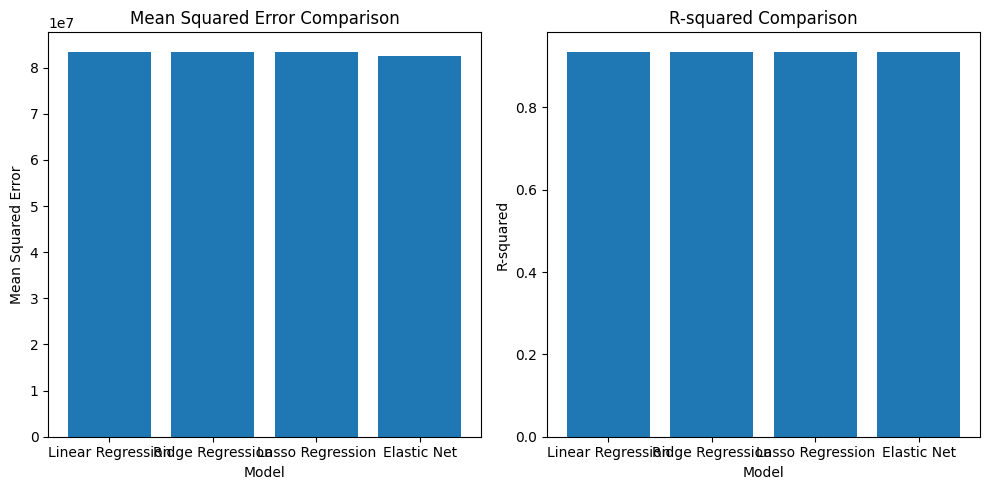

In [100]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net']
mse_values = [mse, mse_ridge, mse_lasso, mse_elastic_net]
r2_values = [r2, r2_ridge, r2_lasso, r2_elastic_net]

# Create bar plots for MSE and R-squared
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')

plt.tight_layout()
plt.show()


Evaluating the Intercept and Coefficient Values of All models


Linear Regression Coefficients: [ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
Ridge Regression Coefficients: [ 8.52e+01 -8.64e+02  7.79e+02  7.74e-01  3.29e-02  3.66e-02]
Lasso Regression Coefficients: [ 0.00e+00 -9.59e+02  6.99e+02  7.73e-01  3.29e-02  3.66e-02]
Elastic Net Regression Coefficients: [ 6.29e+01 -7.31e+02  6.67e+02  7.74e-01  3.23e-02  3.63e-02]
Linear Regression Intercept: 42467.52924853278
Ridge Regression Intercept: 42472.502814257314
Lasso Regression Intercept: 42554.35996745661
Elastic Net Regression Intercept: 42552.22020554196


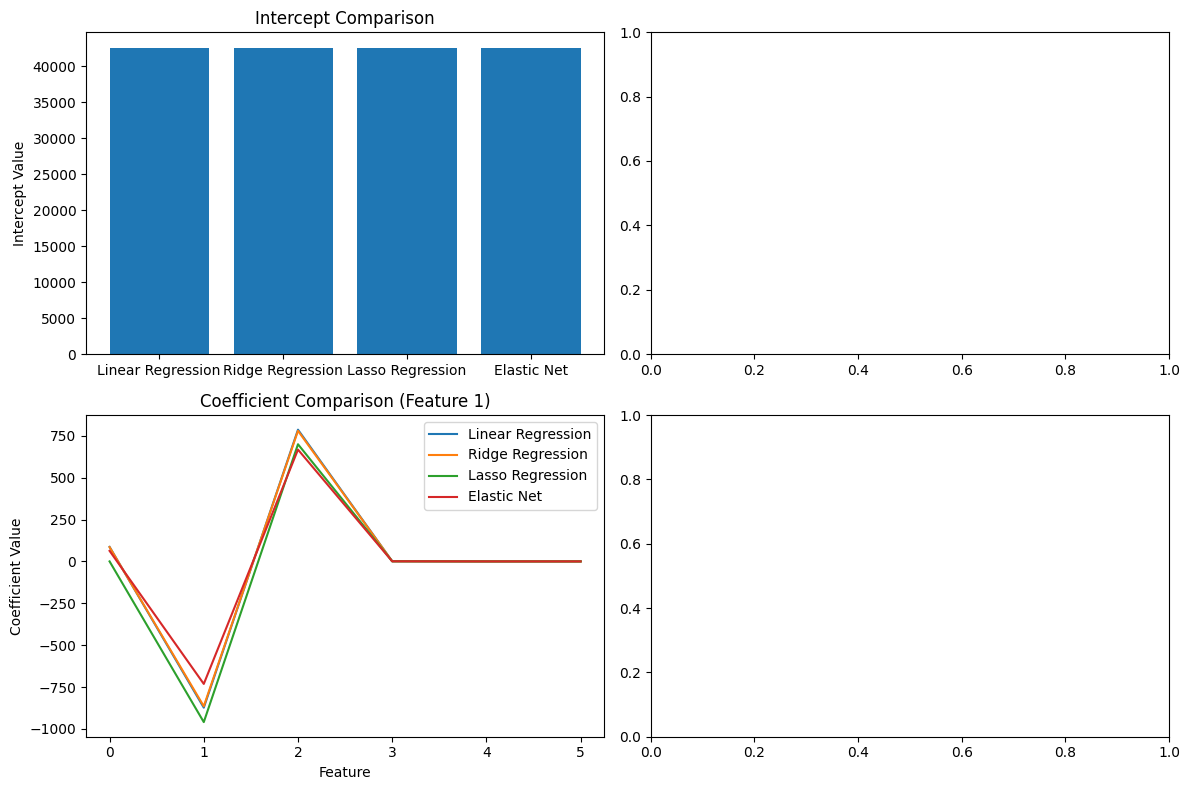

In [101]:
import matplotlib.pyplot as plt



# Model names
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net']


# Coefficients for Linear Regression
linear_coefficients = model.coef_

# Coefficients for Ridge Regression
ridge_coefficients = ridge_model.coef_

# Coefficients for Lasso Regression
lasso_coefficients = lasso_model.coef_

# Coefficients for Elastic Net Regression
elastic_net_coefficients = elastic_net_model.coef_


print("Linear Regression Coefficients:", linear_coefficients)
print("Ridge Regression Coefficients:", ridge_coefficients)
print("Lasso Regression Coefficients:", lasso_coefficients)
print("Elastic Net Regression Coefficients:", elastic_net_coefficients)


# Get intercepts
intercept_linear = model.intercept_
intercept_ridge = ridge_model.intercept_
intercept_lasso = lasso_model.intercept_
intercept_elastic_net = elastic_net_model.intercept_

print("Linear Regression Intercept:", intercept_linear)
print("Ridge Regression Intercept:", intercept_ridge)
print("Lasso Regression Intercept:", intercept_lasso)
print("Elastic Net Regression Intercept:", intercept_elastic_net)

# Intercept values
intercepts = [intercept_linear, intercept_ridge, intercept_lasso, intercept_elastic_net]

# Coefficients (assuming a 2D array)
coefficients = [
    linear_coefficients,
    ridge_coefficients,
    lasso_coefficients,
    elastic_net_coefficients
]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot intercepts
axs[0, 0].bar(models, intercepts)
axs[0, 0].set_title('Intercept Comparison')
axs[0, 0].set_ylabel('Intercept Value')

# Plot coefficients (assuming you have only two features)
for i, coeffs in enumerate(coefficients):
    axs[1, 0].plot(range(len(coeffs)), coeffs, label=models[i])
axs[1, 0].set_title('Coefficient Comparison (Feature 1)')
axs[1, 0].set_xlabel('Feature')
axs[1, 0].set_ylabel('Coefficient Value')
axs[1, 0].legend()

# Plot coefficients for the second feature (if you have more features)
# ...

plt.tight_layout()
plt.show()

Final Verdict

In [102]:
print("Linear Regression")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


print("Ridge Regression")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)


print("Lasso Regression")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)

print("Elasic Net Regression")
print("Mean Squared Error:", mse_elastic_net)
print("R-squared:", r2_elastic_net)

print("Almost all Models are around the same Mean squared, Elastic Net is little better than the other since it combines  L1 and L2 Regularization")

Linear Regression
Mean Squared Error: 83502864.03256194
R-squared: 0.9347068473282546
Ridge Regression
Mean Squared Error: 83439794.25290059
R-squared: 0.9347561632984325
Lasso Regression
Mean Squared Error: 83499836.81254049
R-squared: 0.93470921439364
Elasic Net Regression
Mean Squared Error: 82449047.32167968
R-squared: 0.9355308551774325
Almost all Models are around the same Mean squared, Elastic Net is little better than the other since it combines  L1 and L2 Regularization
